# Day 6: Oireachtas Twitter Network Analysis

In this short project, I take the 25 top tweeting Oireachtas members and see who follows who, using the Twitter REST API. The call that checks if two folks are in a mutual relationship is ratelimited to 180 calls in a 15-minute period. For $\binom{25}{2} = 300$, we do two and call it a day. The graph is modeled and plotted with the help of `networkx`.

In [198]:
%matplotlib inline

import tweepy
import networkx as net
import matplotlib.pyplot as plt

In [7]:
consumer_key = "READ"
consumer_secret = "THESE"
access_key = "FROM"
access_secret = "ENV"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tweepy.API(auth)

In [211]:
# List of TDs curated by the Irish Times

users = api.list_members(list_id=85664542, count=200)

/usr/local/lib/python2.7/dist-packages/requests/packages/urllib3/util/ssl_.py:90: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. For more information, see https://urllib3.readthedocs.org/en/latest/security.html#insecureplatformwarning.
  InsecurePlatformWarning


In [46]:
len(users)

155

In [66]:
tds = []

for user in users:
    td = { 
            'id' : user.id,
            'screen_name' : user.screen_name,
            'followers_count' : user.followers_count
        }
    tds.append(td)    

In [70]:
top_25 = sorted(tds, key=lambda x: x['followers_count'])[-25:]

In [72]:
import itertools

In [80]:
all_pairs = [pair for pair in itertools.combinations(top_25, 2)]

In [212]:
top_25[:5]

[{'followers_count': 8966, 'id': 19735329, 'screen_name': u'Paschald'},
 {'followers_count': 9128, 'id': 74979783, 'screen_name': u'seansherlocktd'},
 {'followers_count': 9318, 'id': 232242473, 'screen_name': u'PhilHoganEU'},
 {'followers_count': 9767, 'id': 190987689, 'screen_name': u'CathMurphyTD'},
 {'followers_count': 10327, 'id': 95658167, 'screen_name': u'fmacconghail'}]

In [120]:
def get_edges(source, target):
    fr = api.show_friendship(source_id=source['id'], target_id=target['id'])
    
    if fr[0].following:
        edges.append((source['screen_name'], target['screen_name']))
    
    if fr[1].following:
        edges.append((target['screen_name'], source['screen_name']))

In [ ]:
edges = []

for index, pair in enumerate(all_pairs[150:]):
    get_edges(pair[0], pair[1])
    print "{} calls made".format(index)
    
# Wait 15 minutes... (Twitter API ratelimiting)

In [ ]:
# ...and do the next part
    
for index, pair in enumerate(all_pairs[:150]):
    get_edges(pair[0], pair[1])
    print "{} calls made".format(index)

In [199]:
# Get rid of duplicates

edges = list(set([tuple(edge) for edge in edges]))

In [200]:
len(edges)

275

In [213]:
edges[:5]

[(u'jerrybuttimer', u'ProfJohnCrown'),
 (u'jerrybuttimer', u'CathMurphyTD'),
 (u'FitzgeraldFrncs', u'LCreighton'),
 (u'joanburton', u'seansherlocktd'),
 (u'fmacconghail', u'LCreighton')]

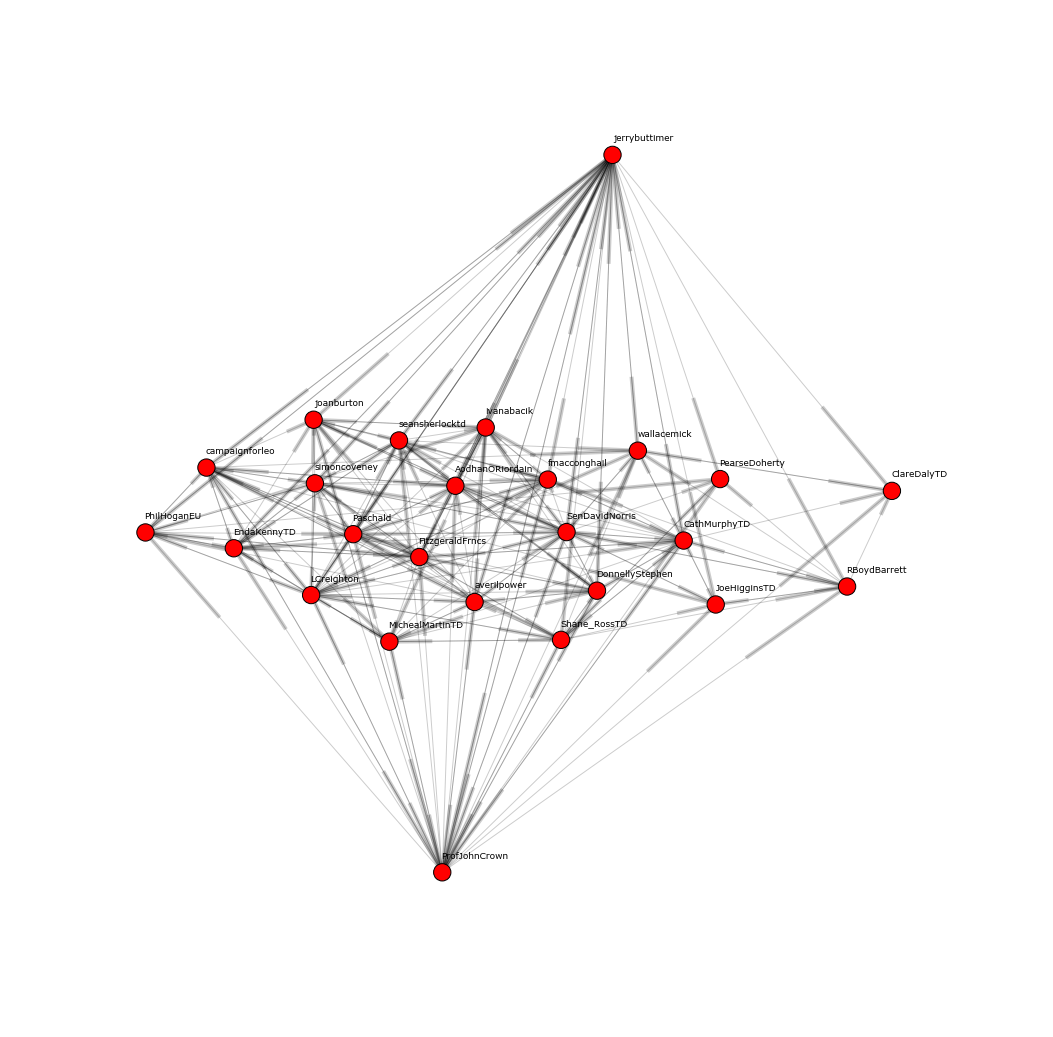

In [210]:
o = net.DiGraph()
for user, followed_by in edges:
    o.add_edge(user, followed_by)
pos = net.spring_layout(o)
plt.figure(figsize=(18, 18))
plt.axis('off')
net.draw_networkx_nodes(o, pos)
net.draw_networkx_edges(o, pos, alpha=0.2)

nodes = [n for n in o.nodes_iter()]

for node in nodes:
    x, y = pos[node]
    plt.text(x, y+0.02, s=node, alpha=1, fontsize=9)